In [1]:
import pandas as pd
columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","gender",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",sep=',',names=columns,engine='python')

In [2]:
df['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [3]:
df.dtypes

age               int64
type_employer    object
fnlwgt            int64
education        object
education_num     int64
marital          object
occupation       object
relationship     object
race             object
gender           object
capital_gain      int64
capital_loss      int64
hr_per_week       int64
country          object
income           object
dtype: object

In [4]:
counts=df.groupby('country').size()
counts

country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                       

In [5]:
counts=df.groupby('age').size()
counts

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64

In [6]:
df.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column]=df[column].apply(lambda x: x.strip())

In [10]:
ml=df[df['gender']=="Male"]
ml.shape

(21790, 15)

In [15]:
ml1=df.loc[(df['gender']=="Male")&(df['income']=='>50K')]
ml1.shape

(6662, 15)

In [22]:
fm=df[df.gender == 'Female']
fm.shape

(10771, 15)

In [23]:
fm1=df[(df.gender == 'Female')&(df.income=='>50K')]
fm1.shape

(1179, 15)

In [24]:
ml['age'].mean()


39.43354749885268

In [27]:
ml1['age'].mean()

44.62578805163614

In [26]:
fm1['age'].mean()

42.125530110262936

In [28]:
ml_mu=ml['age'].mean()
fm_mu=fm['age'].mean()
ml_var=ml['age'].var()
fm_var=fm['age'].var()
ml_std=fm['age'].std()
fm_std=fm['age'].std()
print('mean:',ml_mu,'std:',ml_std,'var:',ml_var)

mean: 39.43354749885268 std: 14.01369709943824 var: 178.77375174530096


In [29]:
ml_median=ml['age'].median()
fm_median=fm['age'].median()
print('Median age per men and women ',ml_median,fm_median)

Median age per men and women  38.0 35.0


In [30]:
ml_median_age=ml1['age'].median()
fm_median_age=fm1['age'].median()
print('Median age per men and women of high income ',ml_median_age,fm_median_age)

Median age per men and women of high income  44.0 41.0


In [31]:
import seaborn as sns

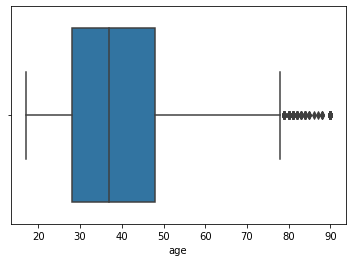

In [32]:
sns.boxplot(df.age)

In [38]:
ml_mode=ml['age'].mode()
fm_mode=fm['age'].mode()
print('mode age per men and women',ml_mode[0],fm_mode[0])

mode age per men and women 35 20


In [39]:
ml_mode_age=ml1['age'].mode()
fm_mode_age=fm1['age'].mode()
print('mode age per men and women of high income ',ml_mode_age[0],fm_mode_age[0])

mode age per men and women of high income  46 43


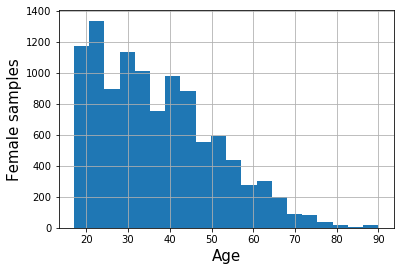

In [43]:
import matplotlib.pyplot as plt 
fm_age=fm['age']
fm_age.hist(histtype='bar',bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()

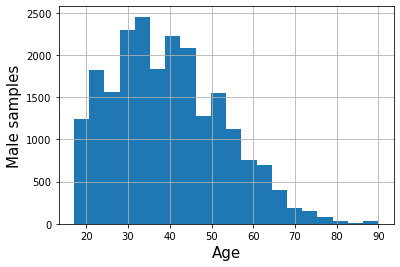

In [42]:
ml_age=ml['age']
ml_age.hist(histtype='bar',bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Male samples',fontsize=15)
plt.show()

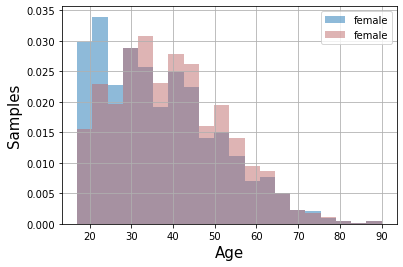

In [46]:
fm_age.hist(density=True,histtype='bar',alpha=.5,bins=20,label='female')
ml_age.hist(density=True,histtype='bar',alpha=.5,bins=20,color=sns.desaturate('indianred',0.75),label='female')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.legend()
plt.show()

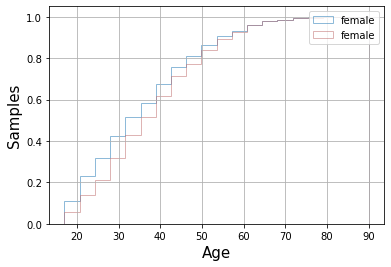

In [48]:
fm_age.hist(density=True,histtype='step',cumulative=True,alpha=.5,bins=20,label='female')
ml_age.hist(density=True,histtype='step',cumulative=True,alpha=.5,bins=20,color=sns.desaturate('indianred',0.75),label='female')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.legend()
plt.show()


In [50]:
df['age'].skew()




0.5587433694130484

In [51]:
df['age'].kurtosis()

-0.16612745957143904

In [ ]:
def skewness(x):
    res=0
    m=x.mean()